**Task 2** Milestone 2

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:
#importing the dataset which is in csv file
data=pd.read_csv('/content/Bank_Personal_Loan.csv')
data.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
#finding the sum of null values in each column
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
data['ID'] = data['ID'].fillna(data['ID'].mode()[0])

In [6]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

In [7]:
data['Experience'] = data['Experience'].fillna(data['Experience'].mode()[0])

In [8]:
#data['Income']=data['Income'].str.replace('+','')

In [9]:
data['ZIP Code'] = data['ZIP Code'].fillna(data['ZIP Code'].mode()[0])
data['Family'] = data['Family'].fillna(data['Family'].mode()[0])
data['CCAvg'] = data['CCAvg'].fillna(data['CCAvg'].mode()[0])
data['Education'] = data['Education'].fillna(data['Education'].mode()[0])
data['Mortgage'] = data['Mortgage'].fillna(data['Mortgage'].mode()[0])
data['Personal Loan'] = data['Personal Loan'].fillna(data['Personal Loan'].mode()[0])
data['Securities Account'] = data['Securities Account'].fillna(data['Securities Account'].mode()[0])
data['CD Account'] = data['CD Account'].fillna(data['CD Account'].mode()[0])
data['Online'] = data['Online'].fillna(data['Online'].mode()[0])
data['CreditCard'] = data['CreditCard'].fillna(data['CreditCard'].mode()[0])

In [10]:
data['ID']=data['ID'].astype('int64')
data['Age']=data['Age'].astype('int64')
data['Experience']=data['Experience'].astype('int64')
data['ZIP Code']=data['ZIP Code'].astype('int64')
data['Family']=data['Family'].astype('int64')
data['Education']=data['Education'].astype('int64')
data['Mortgage']=data['Mortgage'].astype('int64')
data['Personal Loan']=data['Personal Loan'].astype('int64')
data['Securities Account']=data['Securities Account'].astype('int64')
data['CD Account']=data['CD Account'].astype('int64')
data['Online']=data['Online'].astype('int64')
data['CreditCard']=data['CreditCard'].astype('int64')

In [11]:
#Balancine dataset by using smote
from imblearn.combine import SMOTETomek

In [ ]:
smote = SMOTETomek(0.90)

In [13]:
#dividing the dataset into dependent nd independent y and x respectively
y=data['Personal Loan']
x=data.drop(columns=['Personal Loan'],axis=1)

In [ ]:
#ceating a new x and y variables for the balanced set
x_bal,y_bal=smote.fit_resample(x,y)

In [ ]:
#printing the values of y before balancing the data and after
print(y.value_counts())
print(y_bal.value_counts())

**Task 3** Milestone 3

In [16]:
data.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [ ]:
#plotting the using distplot
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.displot(data['Income'])
plt.subplot(122)
sns.displot(data['CD Account'])
plt.show()

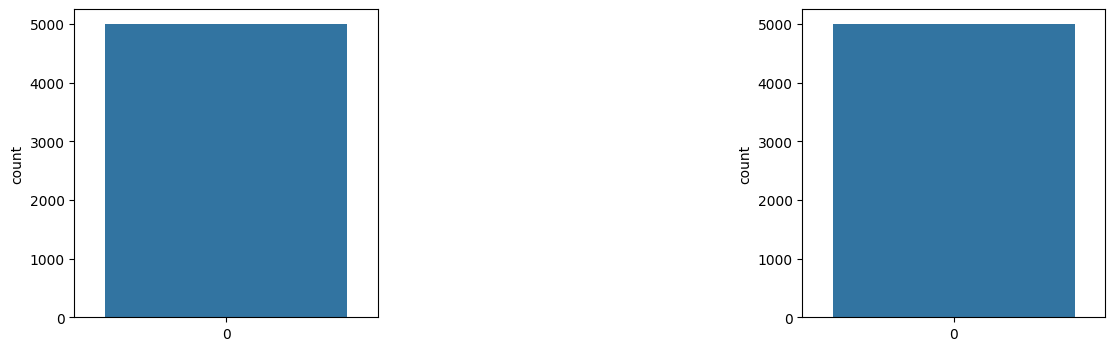

In [18]:
#plotting the count plot
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Experience'])
plt.subplot(1,4,3)
sns.countplot(data['Education'])
plt.show()

In [ ]:
#visualising two columns against each other
plt.figure(figure=(20,5))
plt.subplot(131)
sns.countplot(data['ID'], hue=data['Age'])
plt.subplot(132)
sns.countplot(data['Experience'], hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Income'], hue=data['Personal Loan'])

In [ ]:
#visulized based gender and income what would be the application status
sns.swarmplot(data['Age'],data['Income'], hue = data['CD Account'])

In [ ]:
#perfroming feature scaling iperation using standard scaller on x part of the dataset because
#there different type of values in the columns
from imblearn.combine import SMOTETomek
smote = SMOTETomek(0.90)
x_bal,y_bal = smote.fit_resample(x,y)
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_bal=pd.DataFrame(x.bal,columns=names)

In [ ]:
#splitting the dataset in train and test on balanced datasew
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.33, random_state=42)

**Task 4** Milestone 4

In [25]:
def decisionTree(x_train,x_test,y_train,y_test):
    dt=DecisionTreeClassifier()
    dt.fix(x_train,y_train)
    yPred=dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [26]:
def randomForest(x_train,x_test,y_train,y_test):
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred=rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [27]:
def KNN(x_train,x_test,y_train,y_test):
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred=knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [28]:
def xgboost(x_train,x_test,y_train,y_test):
    xg=GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred=xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [ ]:
#ANN
#importing the keras libraries and packages
import tensorflow
from tensorflow.keras.models import sequential
from tensorflow.keras.layers import Dense

In [ ]:
#Initialising the ANN
classifier = sequential()

In [ ]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(units=100,activation='relu',input_dim=11))

In [ ]:
#Adding the second hidden layer
classifier.add(Dense(units=50,activation='relu'))

In [ ]:
#Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Fitting the ANN to the Training set
model_history=classifier.fit(x.train,y_train,batch_size=100,validation_split=0.2,epochs=100)

In [ ]:
#Gender Married Dependents Education Self Employed Application CoapplicationIncome Loan_AccountTera
dtr.predict([[1,1,0,4276,240,0,1]])

In [ ]:
rfr.predict([[1,1,0,1,1,4276,1542,145,0,1]])

In [ ]:
knn.predict([[1,1,0,1,1,4276,1542,145,0,1]])

In [ ]:
xgb.predict([[1,1,0,1,1,4276,1542,145,0,1]])

In [ ]:
classifier.save("loan.h5")

In [ ]:
#predicting the Test set results
y_pred=classifier.predict(x_test)

In [ ]:
y_pred

In [ ]:
y_pred=(y_pred>0.5)
y_pred

In [ ]:
def predict_exit(sample_value):
sample_value = np.array(sample_value)
sample_value=sample_value.reshape(1, -1)
sample_value=sc.transform(sample_value)
return classifier.predict(sample_value)

In [ ]:
sample_value=[[1,1, 0, 1, 4276, 1542,145,240,0,1]]
if predict_exit(sample_value)>0.5:
print('prediction: High chance of Loan Approval!')
else:
print('prediction:low chance Loan Approval.')

In [ ]:
sample_value=[[1,0, 1, 1, 1, 45, 14,45,240, 1,1]]
if predict_exit(sample_value)>0.5:
print('prediction: High chance of Loan Approval!')
else:
print('prediction:low chance Loan Approval.')

***Task 5*** Milestone 5

In [ ]:
def compareModel(x_train,x_test,y_train,y_test):
decisionTree(x_train,x_test,y_train,y_test)
print('-'*100)
RandomForest(x_train,x_test,y_train,y_test)
print('-'*100)
XGB(x_train,x_test,y_train,y_test)
print('-'*100)
KNN(x_train,x_test,y_train,y_test)
print('-'*100)

In [ ]:
compareModel(X_train,X_test,y_train,y_test)

In [ ]:
yPred = classfier.predict(X_test)
print(accuracy_score(y_pred,y_test))
print("ANN Model")
print("Confusion_Matrix")
print(confusion _matrix(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.model_selection import cros_val_score

In [ ]:
# Randam forest  model is selected
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
ypred = rf.predict(x_test)

In [ ]:
f1_score(ypred,y_test,average='weighted')

In [ ]:
cv = cross_val_score(rf,x,y,cv=5)

In [ ]:
np.mean(cv)

**Task 6** Milestone 6

In [ ]:
pickle.dump(model,open('rdf.pkl','wb'))

In [ ]:
from flask import Flask , render_templete, request
import numpy as np
import pickle

In [ ]:
app = Flask(_name_)
model = pickle.load(open(r'rdf.pkl','rb'))
scale = pickle.load(open(r'scole1.pkl','rb'))

In [ ]:
input_feature=[int(x) for x in request.form.values() ]

In [ ]:
input_feature=[np.array(input_feature)]
print(input_features)
names = ['Gender','Married','Depends','Education','ApplicantIncome',CoapplicatntIncome','LoanAmount','Loan_Amount_Term','Crdit_history','Property_Area']
data = pandas.DataFrame(input_features,columns=names
print(data)

In [ ]:
prediction = model1.predict(data)
print(prediction)
prediction=int(prediction)
print(type(prediction))

In [ ]:
if (prediction == 0):
return render_template("output.html",result="Loan Will not be Approved")
else:
return render_template("output.html",result="Loan Will not be Approved")

In [ ]:
if __name__=="__main__":

In [ ]:
port=int(os.environ.get('PORT',5000))
app.run(debug=false)